In [ ]:
# importing libraries to visualize the dataset
import pandas as pd
import matplotlib.pyplot as plt
!pip install openpyxl   # library used to read, write, and edit Excel files with the .xlsx format



   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   ---------------------------------------- 2/2 [openpyxl]



In [5]:
file_path= "C://Users//preet//dsi//visualization//02_activities//assignments//assignment3//data//overall_2022_kpi_report_for_publication_full_en.xlsx"

df=pd.read_excel(file_path)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3574 entries, 0 to 3573
Data columns (total 16 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   COLLEGE ID                                          3573 non-null   object
 1   COLLEGE NAME                                        3566 non-null   object
 2   CAMPUS ID                                           3566 non-null   object
 3   CAMPUS                                              3566 non-null   object
 4   CITY/TOWN                                           3205 non-null   object
 5   POSTAL CODE                                         3205 non-null   object
 6   PROGRAM NAME                                        3565 non-null   object
 7   PROGRAM TYPE                                        2676 non-null   object
 8   PROGRAM CATEGORY                                    2676 non-null   object
 9   AUDIT   

In [7]:
df.head()

,COLLEGE ID,COLLEGE NAME,CAMPUS ID,CAMPUS,CITY/TOWN,POSTAL CODE,PROGRAM NAME,PROGRAM TYPE,PROGRAM CATEGORY,AUDIT,GRADUATION RATE\n(%),GRADUATE EMPLOYMENT RATE\n(%),GRADUATE EMPLOYMENT RATE IN THE FIELD OF STUDY\n(%),GRADUATE SATISFACTION RATE\n(% Satisfied),EMPLOYER SATISFACTION RATE\n(% Satisfied),OSAP DEFAULT RATE\n(%)
0,PROVINCE-WIDE,ALL CAREER COLLEGES COMBINED,+,All Campuses Combined,NaN,NaN,NaN,NaN,NaN,NaN,0.752248,0.80381,0.625502,0.79809,0.935165,0.061123
1,200002,ROBAR CENTRE FOR TRANSPORT TRAINING INC.,+,+,NaN,NaN,+,NaN,NaN,Y,0.95455,0.77143,0.6,0.94286,1,ND
2,200002,ROBAR CENTRE FOR TRANSPORT TRAINING INC.,101148,"ROBAR CENTRE FOR TRANSPORT TRAINING, HANNON",HANNON,L0R 1P0,+,NaN,NaN,Y,0.95455,0.77143,0.6,0.94286,1,ND
3,200002,ROBAR CENTRE FOR TRANSPORT TRAINING INC.,101148,"ROBAR CENTRE FOR TRANSPORT TRAINING, HANNON",HANNON,L0R 1P0,HEAVY EQUIPMENT OPERATOR,Construction Trade,Heavy Equipment Operator,Y,0.95455,0.77143,0.6,0.94286,1,ND
4,200024,ADVANCED FINANCIAL SOLUTIONS INC.,+,+,NaN,NaN,+,NaN,NaN,Y,0.97778,0.5,0.33333,0.8125,ND,ND


In [ ]:
# removing unwanted spaces, %, (,), from the columns
df.columns = (
    df.columns
    .str.strip()                      # remove leading/trailing spaces
    .str.replace('\n', ' ')           # replace newlines with spaces
    .str.replace('%', '')             # remove percentage symbols
    .str.replace('(', '')             # remove parentheses
    .str.replace(')', '')
)

In [9]:
df.columns

Index(['COLLEGE ID', 'COLLEGE NAME', 'CAMPUS ID', 'CAMPUS', 'CITY/TOWN',
       'POSTAL CODE', 'PROGRAM NAME', 'PROGRAM TYPE', 'PROGRAM CATEGORY',
       'AUDIT', 'GRADUATION RATE ', 'GRADUATE EMPLOYMENT RATE ',
       'GRADUATE EMPLOYMENT RATE IN THE FIELD OF STUDY ',
       'GRADUATE SATISFACTION RATE  Satisfied',
       'EMPLOYER SATISFACTION RATE  Satisfied', 'OSAP DEFAULT RATE '],
      dtype='object')

In [14]:
# identifying the kpi columns
kpi_columns = [col for col in df.columns if any(keyword in col for keyword in [
    'GRADUATION RATE',
    'GRADUATE EMPLOYMENT RATE',
    'GRADUATE SATISFACTION',
    'EMPLOYER SATISFACTION',
    'OSAP DEFAULT RATE'
])]
print(kpi_columns)

['GRADUATION RATE ', 'GRADUATE EMPLOYMENT RATE ', 'GRADUATE EMPLOYMENT RATE IN THE FIELD OF STUDY ', 'GRADUATE SATISFACTION RATE  Satisfied', 'EMPLOYER SATISFACTION RATE  Satisfied', 'OSAP DEFAULT RATE ']


In [18]:
# converting KPI columns to numeric, replaces values with Nan if it can't convert it to numeric.
df_kpi = df[kpi_columns].apply(pd.to_numeric, errors='coerce')
df_kpi.head()

,GRADUATION RATE,GRADUATE EMPLOYMENT RATE,GRADUATE EMPLOYMENT RATE IN THE FIELD OF STUDY,GRADUATE SATISFACTION RATE Satisfied,EMPLOYER SATISFACTION RATE Satisfied,OSAP DEFAULT RATE
0,0.752248,0.80381,0.625502,0.79809,0.935165,0.061123
1,0.954550,0.77143,0.600000,0.94286,1.000000,NaN
2,0.954550,0.77143,0.600000,0.94286,1.000000,NaN
3,0.954550,0.77143,0.600000,0.94286,1.000000,NaN
4,0.977780,0.50000,0.333330,0.81250,NaN,NaN


In [21]:
#calculating average KPI values across all colleges ---
kpi_means = df_kpi.mean().sort_values(ascending=False)

kpi_means

EMPLOYER SATISFACTION RATE  Satisfied              0.937924
GRADUATE EMPLOYMENT RATE                           0.798582
GRADUATE SATISFACTION RATE  Satisfied              0.777489
GRADUATION RATE                                    0.711044
GRADUATE EMPLOYMENT RATE IN THE FIELD OF STUDY     0.623329
OSAP DEFAULT RATE                                  0.070356
dtype: float64

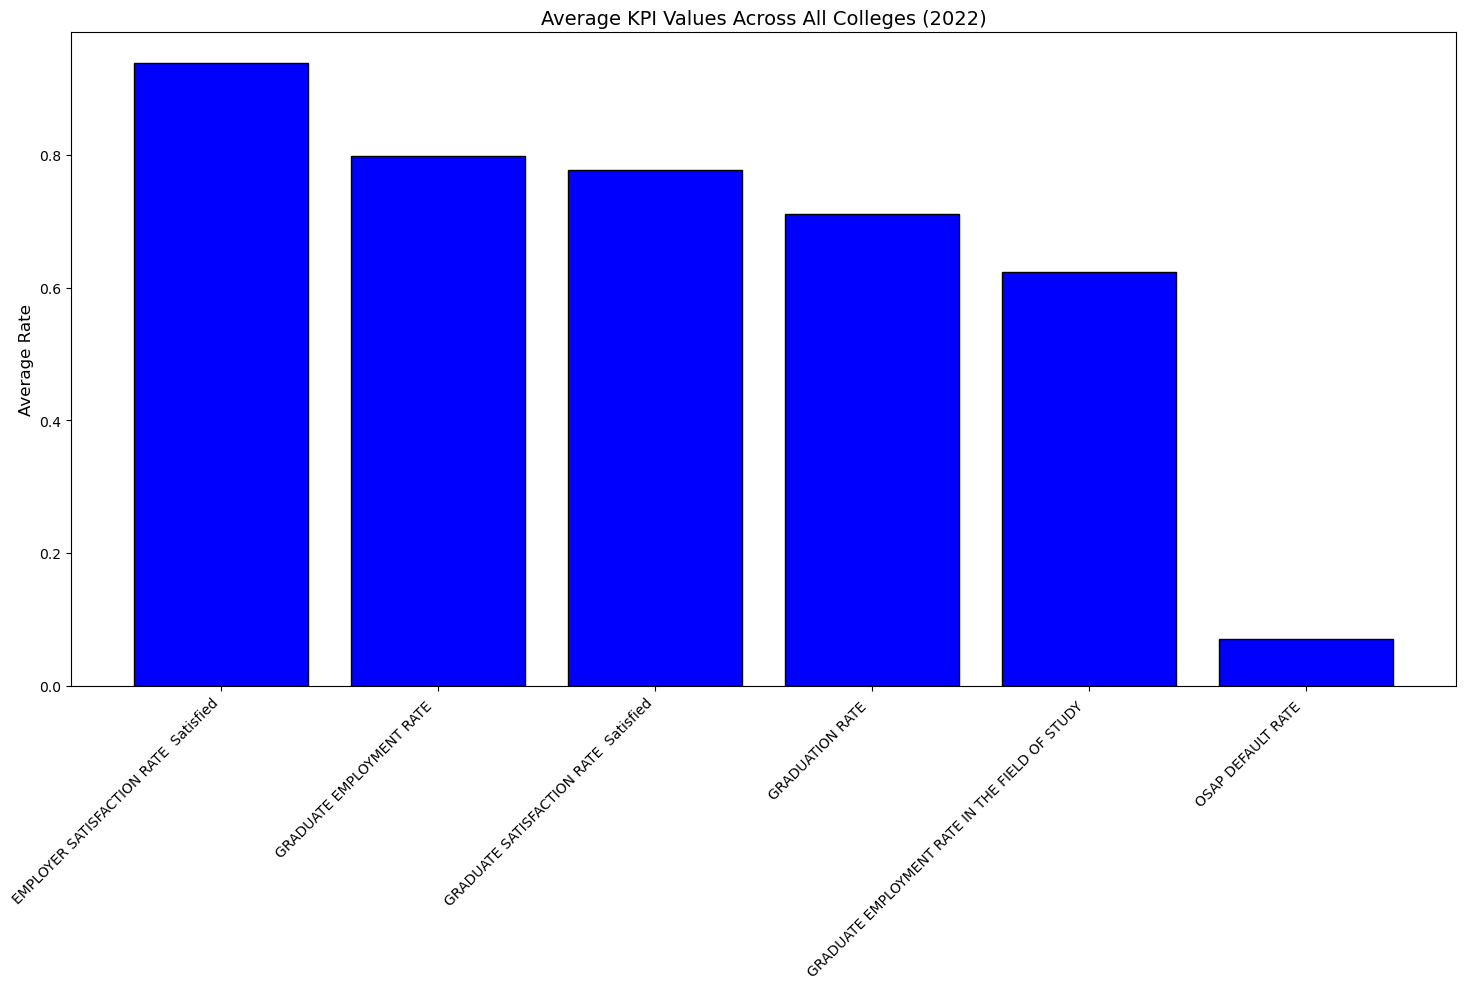

In [24]:
# Visualization  - Bar chart of average KPI values ---
plt.figure(figsize=(15, 10))
plt.bar(kpi_means.index, kpi_means.values, color='blue', edgecolor='black')
plt.title("Average KPI Values Across All Colleges (2022)", fontsize=14)
plt.ylabel("Average Rate", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()